# Analysis of Prepaid Plans

The telecom operator Megaline offers its clients two prepaid plans: Surf and Ultimate. <br> The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget. There is data on 500 Megaline clients: Who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. <br> The goal is to analyse the clients' behavior and to determine which prepaid plan brings in more revenue.

Information about the prepaid plans:
<br> <br>
Surf:
- Monthly charge: 20 Dollars
- 500 monthly minutes, 50 texts, and 15 GB of data
- After exceeding the package limits:
- 1 minute: 3 cents
- 1 text message: 3 cents
- 1 GB of data: 10 Dollars

Ultimate:
- Monthly charge: 70 Dollars
- 3000 monthly minutes, 1000 text messages, and 30 GB of data
- After exceeding the package limits:
- 1 minute: 1 cent
- 1 text message: 1 cent
- 1 GB of data: 7 Dollars

Note: <br>
Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

# Table of Contents

- 1) [Open the data file and study the general information](#1)
<br> <br>
- 2) [Prepare the data](#2)
<br> <br>
    - 2.1) [Overview of the data and conversion of data types](#2.1)
    - 2.2) [Find and eliminate errors](#2.2)
    - 2.3) [Create table for analysis](#2.3)
<br> <br>
- 3) [Analysis](#3)
<br> <br>
    - 3.1) [Before removing outliers](#3.1)
        - 3.1.1) [Call minutes per month](#3.1.1)
        - 3.1.2) [Text messages per month](#3.1.2)
        - 3.1.3) [Data volume per month](#3.1.3)
    - 3.2) [After removing outliers](#3.2)
        - 3.2.1) [Call minutes per month](#3.2.1)
        - 3.2.2) [Text messages per month](#3.2.2)
        - 3.2.3) [Data volume per month](#3.2.3)
<br> <br>
- 4) [Test the hypotheses](#4)
<br> <br>
    - 4.1) [Hypothesis 1: The average revenue from users of Ultimate and Surf calling plans differs.](#4.1)
    - 4.2) [Hypothesis 2: The average revenue from users in NY-NJ area is different from that of the users from other regions.](#4.2)
<br> <br>
- 5) [Overall conclusion](#5)    

<a id="1"></a>

## 1) Open the data file and study the general information

In [1]:
# import libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [2]:
# read csv files
try:
    df_calls = pd.read_csv('C:/Users/Herbert/Documents/Practicum100/datasets/sda/megaline_calls.csv')
    df_internet = pd.read_csv('C:/Users/Herbert/Documents/Practicum100/datasets/sda/megaline_internet.csv')
    df_messages = pd.read_csv('C:/Users/Herbert/Documents/Practicum100/datasets/sda/megaline_messages.csv')
    df_plans = pd.read_csv('C:/Users/Herbert/Documents/Practicum100/datasets/sda/megaline_plans.csv')
    df_users = pd.read_csv('C:/Users/Herbert/Documents/Practicum100/datasets/sda/megaline_users.csv')
except:
    print("Couldn't read csv files.")

Print head and info of every table:

In [3]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [6]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [7]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [8]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [10]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [11]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [12]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Conclusion

We have five tables. <br>
The three tables 'df_calls', 'df_internet' and 'df_messages' show the duration time of phone calls, the used volume of data and the message IDs for every phone call, month with internet access and message the costumers had. The table 'df_plans' shows the conditions of the two possible prepaid plans. Many informations - also the 'user_id' - of the costumers can be found in the table 'df_users'. <br>
Besides the table 'df_plans', the other four tables have all the column 'user_id' which is the connection column for the tables. Only table 'df_users' has missing values; only in the column 'churn_date'. In that column the missing value means that the costumer has used the service at the moment the data has been retrieved. <br>
The columns in the float64 data type have minutes, megabytes or dollars as units.

<a id="2"></a>

## 2) Prepare the data

<a id="2.1"></a>

### 2.1) Overview of the data and conversion of data types

###### table df_calls

In [13]:
###### table df_calls


# transform the data type of the column 'call_date' to Datetime64
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [14]:
# search for duplicates
print("There are {} duplicates in the table 'df_calls'.".format(df_calls.duplicated(subset=['id']).sum()))

There are 0 duplicates in the table 'df_calls'.


In [15]:
# add column 'call_month' which tells us the month of the call date
df_calls['month'] = df_calls['call_date'].dt.month

In [16]:
# round up numbers in the column 'duration' since the prepaid plans are rounding up minutes
df_calls['duration'] = df_calls['duration'].apply(np.ceil)

In [17]:
# overview of duration values
print("The minimum value for duration is {} and".format(df_calls['duration'].min()))
print("the maximum value for duration is {}.".format(df_calls['duration'].max()))
print("{:.1%} of all calls have a duration of 0 seconds." \
      .format(len(df_calls[df_calls['duration'] == 0])/ len(df_calls)))

The minimum value for duration is 0.0 and
the maximum value for duration is 38.0.
19.5% of all calls have a duration of 0 seconds.


The calls with a duration of 0 seconds might be missed calls. Since the percentage of these missed calls is very high, I leave them in the table.

In [18]:
# I create the new column 'is_missed' that has 1 as value when the call might be missed (duration = 0) and the value
# 0 when the call wasn't missed (duration > 0).

for i in range(len(df_calls)):
    if df_calls.loc[i, 'duration'] == 0:
        df_calls.loc[i, 'is_missed'] = 1
    else:
        df_calls.loc[i, 'is_missed'] = 0

In [19]:
# overview of call dates
print("The earliest date is", df_calls['call_date'].min())
print("The latest date is", df_calls['call_date'].max())

The earliest date is 2018-01-15 00:00:00
The latest date is 2018-12-31 00:00:00


In [20]:
# Now, there are only integers in the column 'duration', so we change this column to int32 data type.
try:
    df_calls['duration'] = df_calls['duration'].astype(int)
except:
    print("Couldn't transform the column 'duration' into int32 data type.")

In [21]:
df_calls.head()

,id,user_id,call_date,duration,month,is_missed
0,1000_93,1000,2018-12-27,9,12,0.0
1,1000_145,1000,2018-12-27,14,12,0.0
2,1000_247,1000,2018-12-27,15,12,0.0
3,1000_309,1000,2018-12-28,6,12,0.0
4,1000_380,1000,2018-12-30,5,12,0.0


In [22]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null int32
month        137735 non-null int64
is_missed    137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(1)
memory usage: 5.8+ MB


###### table df_internet

In [23]:
###### table df_internet


# transform the data type of the column 'session_date' to Datetime64
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

In [24]:
# search for duplicates
print("There are {} duplicates in the table 'df_internet'.".format(df_internet.duplicated(subset=['id']).sum()))

There are 0 duplicates in the table 'df_internet'.


In [25]:
# add column 'session_month' which tells us the month of the session date.
df_internet['month'] = df_internet['session_date'].dt.month

In [26]:
# overview of 'mb_used' values
print("The minimum value for 'mb_used' is {} MB and".format(df_internet['mb_used'].min()))
print("the maximum value for 'mb_used' is {} MB.".format(df_internet['mb_used'].max()))
print("{:.1%} of all sessions have a data volume of 0 MB." \
      .format(len(df_internet[df_internet['mb_used'] == 0])/ len(df_internet)))

The minimum value for 'mb_used' is 0.0 MB and
the maximum value for 'mb_used' is 1693.47 MB.
13.1% of all sessions have a data volume of 0 MB.


The sessions with 0 MB might be sessions that used a so small amount of data that the system counted them as 0.00 MB.
Since the percentage of these sessions is very high, I leave them in the table.

In [27]:
# overview of session dates
print("The earliest date is", df_internet['session_date'].min())
print("The latest date is", df_internet['session_date'].max())

The earliest date is 2018-01-15 00:00:00
The latest date is 2018-12-31 00:00:00


Both dates correspond exactly to those minimum and maximum dates from the table 'df_calls'.

In [28]:
df_internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [29]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
month           104825 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


###### table df_messages

In [30]:
###### table df_messages


# transform the data type of the column 'message_date' to Datetime64
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

In [31]:
# search for duplicates
print("There are {} duplicates in the table 'df_messages'.".format(df_messages.duplicated(subset=['id']).sum()))

There are 0 duplicates in the table 'df_messages'.


In [32]:
# add column 'message_month' which tells us the month of the message date.
df_messages['month'] = df_messages['message_date'].dt.month

In [33]:
# overview of message dates
print("The earliest date is", df_messages['message_date'].min())
print("The latest date is", df_messages['message_date'].max())

The earliest date is 2018-01-15 00:00:00
The latest date is 2018-12-31 00:00:00


So all three tables with messages, data volumes and call durations have the same earliest and latest date, that means all captured dates are in the year 2018, between the 2018-01-15 and the 2018-12-31.

In [34]:
df_messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [35]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
month           76051 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


###### table 'df_users'

In [36]:
###### table 'df_users'


df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [37]:
# transform the data type of the columns 'reg_date' and 'churn_date' to Datetime64
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [38]:
# search for duplicates
print("There are {} duplicates in the table 'df_users'.".format(df_users.duplicated(subset=['user_id']).sum()))
df_users_drop = df_users.drop(columns=['user_id'])
print("There are {} costumers that are registrated multiple times in the table 'df_users'." \
.format(df_users_drop.duplicated().sum()))

There are 0 duplicates in the table 'df_users'.
There are 0 costumers that are registrated multiple times in the table 'df_users'.


In [39]:
# overview for values
print("The smallest age is", df_users['age'].min())
print("The biggest age is", df_users['age'].max())
print()
print("The number of costumers using ultimate is", len(df_users[df_users['plan'] == 'ultimate']))
print("The number of costumers using surf is", len(df_users[df_users['plan'] == 'surf']))
print("As expected, both values sum up to {} customers.".format(len(df_users[df_users['plan'] == 'ultimate']) + \
                                                                len(df_users[df_users['plan'] == 'surf'])))
print()
print("The earliest registration date is", df_users['reg_date'].min())
print("The latest registration date is", df_users['reg_date'].max())
print()
print("The earliest chrun date is", df_users['churn_date'].min())
print("The latest churn date is", df_users['churn_date'].max())

The smallest age is 18
The biggest age is 75

The number of costumers using ultimate is 161
The number of costumers using surf is 339
As expected, both values sum up to 500 customers.

The earliest registration date is 2018-01-01 00:00:00
The latest registration date is 2018-12-31 00:00:00

The earliest chrun date is 2018-07-31 00:00:00
The latest churn date is 2018-12-31 00:00:00


Churn_date — the date the user stopped using the service. <br>
If the value is missing, the calling plan has being used when the data was retrieved.
Since the latest date is 2018-12-31 in all our DataFrames, we can set the missing values for 'churn_date' with a date
that is after that date (here: 2019-12-31) since we only analyse data that has been collected until 2018-12-31 and
since I suppose the churn date to be the last day where the service can be used.
Later, when determining service usages after churn dates, the date 2019-12-31 ensures that no data will
be wrongly deleted.

In [40]:
# filling in missing values
df_users = df_users.fillna('2019-12-31')
# transform to datetime format
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [41]:
# Later for creating the table that is need for the analysis, it's helpful to have some columns containing day and
# month of registration dates and churn dates.

# add columns
df_users['reg_month'] = df_users['reg_date'].dt.month
df_users['reg_day'] = df_users['reg_date'].dt.day
df_users['churn_month'] = df_users['churn_date'].dt.month
df_users['churn_day'] = df_users['churn_date'].dt.day

In [42]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,reg_day,churn_month,churn_day
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-12-31,12,24,12,31
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-12-31,8,13,12,31
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2019-12-31,10,21,12,31
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2019-12-31,1,28,12,31
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2019-12-31,5,23,12,31


In [43]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
user_id        500 non-null int64
first_name     500 non-null object
last_name      500 non-null object
age            500 non-null int64
city           500 non-null object
reg_date       500 non-null datetime64[ns]
plan           500 non-null object
churn_date     500 non-null datetime64[ns]
reg_month      500 non-null int64
reg_day        500 non-null int64
churn_month    500 non-null int64
churn_day      500 non-null int64
dtypes: datetime64[ns](2), int64(6), object(4)
memory usage: 47.0+ KB


#### Conclusion

For all tables, I couldn't find any duplicates. <br>
All dates that are included in the tables had values between 1. january 2018 and 31. december 2018. For my analysis, I've filled the missing values in 'churn_date' with 2019-12-31 since the missing value means that the customer used the service at least till the end of the moment when the data was received, I've replaced them by a later date (2019-12-31). <br>
The call duration values in the table df_calls I've rounded up since for calculating the revenues we only need the rounded up minutes. In this table I've also added a column 'is_missed' so in the analysis I can use it when deciding whether to accept calls that might be missed (duration = 0). <br>
The values of df_internet in the column 'mb_used' I've not rounded up since we sum the sessions up for every month for determining the revenue. <br>
The maximum and minimum values for age and registration dates and churn dates are inconspicuous. <br>
I've transformed all date strings into Datetime data types. The user_id values are integers.

<a id="2.2"></a>

### 2.2) Find and eliminate errors

###### Delete usages after churn date and before registration

I will delete all rows in the tables df_calls, df_internet and df_messages that have dates before registration date or after churn date.

In [44]:
# In order to see that the index in df_users is exactly the integer in user_id minus 1000, I create a test column in
# df_users that should have only 0 as values since the for loop substracts one more for an index that increased about 1.
# Value counts in the test column:

# see that the index in df_users is exactly the integer in id_user minus 1000. For that, create test column in df_users:
subtrahend = 1000
for i in range(len(df_users)):
    df_users.loc[i, 'test'] = df_users.loc[i, 'user_id'] - subtrahend
    subtrahend += 1
subtrahend = 1000

# print the value counts of that test column
print(df_users['test'].value_counts())

# delete that test column
df_users = df_users.drop(columns=['test'])

0.0    500
Name: test, dtype: int64


That test column was important for checking that my for-loops are right. These loops determine the erroneous rows in our three DataFrames regarding their dates by adding a column named 'is_date_error'. The value 1 means that this row has a erroneous date.

In [45]:
# All these if-cases ensure that the value for 'is_date_error' is 1 when the service usage was before registration date or
# after churn date
# the latest date for all registrated usages in df_calls, df_internet and df_messages was 2018-12-31; so there will be no
# faults for the cases with the filled missing values: 'smaller than 2019-12-31'

for i in range(len(df_calls)):
    user_id = df_calls.loc[i, 'user_id']
    index = user_id - 1000
    if df_calls.loc[i, 'call_date'] < df_users.loc[index, 'reg_date'] or \
       df_calls.loc[i, 'call_date'] > df_users.loc[index, 'churn_date']:
        df_calls.loc[i, 'is_date_error'] = 1
    else:
        df_calls.loc[i, 'is_date_error'] = 0

print("Value counts of the row 'is_date_error' in table df_calls:")
print()
print(df_calls['is_date_error'].value_counts())

Value counts of the row 'is_date_error' in table df_calls:

0.0    134774
1.0      2961
Name: is_date_error, dtype: int64


In [46]:
for i in range(len(df_messages)):
    user_id = df_messages.loc[i, 'user_id']
    index = user_id - 1000
    if df_messages.loc[i, 'message_date'] < df_users.loc[index, 'reg_date'] or \
       df_messages.loc[i, 'message_date'] > df_users.loc[index, 'churn_date']:
        df_messages.loc[i, 'is_date_error'] = 1
    else:
        df_messages.loc[i, 'is_date_error'] = 0

print("Value counts of the row 'is_date_error' in table df_messages:")
print()
print(df_messages['is_date_error'].value_counts())

Value counts of the row 'is_date_error' in table df_messages:

0.0    74460
1.0     1591
Name: is_date_error, dtype: int64


In [47]:
for i in range(len(df_internet)):
    user_id = df_internet.loc[i, 'user_id']
    index = user_id - 1000
    if df_internet.loc[i, 'session_date'] < df_users.loc[index, 'reg_date'] or \
       df_internet.loc[i, 'session_date'] > df_users.loc[index, 'churn_date']:
        df_internet.loc[i, 'is_date_error'] = 1
    else:
        df_internet.loc[i, 'is_date_error'] = 0

print("Value counts of the row 'is_date_error' in table df_internet:")
print()
print(df_internet['is_date_error'].value_counts())

Value counts of the row 'is_date_error' in table df_internet:

0.0    102362
1.0      2463
Name: is_date_error, dtype: int64


In [48]:
# After having found the erroneous rows I delete them

df_calls = df_calls[df_calls['is_date_error'] == 0]
df_messages = df_messages[df_messages['is_date_error'] == 0]
df_internet = df_internet[df_internet['is_date_error'] == 0]

#### Conclusion

I filtered the three tables df_internet, df_calls and df_messages: It is not possible to use the service before registration date and after churn date, so I checked the date of every row in the three tables. When this error is true, then the added column 'is_date_error' has a value of 1. When looking at its value counts, overall, for every table the quote of erroneous rows is approximatelly 2-3%. These rows are deleted.

<a id="2.3"></a>

### 2.3) Create table for analysis

In [49]:
###### Build a DataFrame

# Create df with a length of 12 and the values 1-12 as months in the column 'month'
df = pd.DataFrame(index=[0,1,2,3,4,5,6,7,8,9,10,11], columns=['month'], data=[1,2,3,4,5,6,7,8,9,10,11,12])

# All these months correspond to the first user ID
df['user_id'] = 1000

# sort the columns
df = df[['user_id', 'month']]

# I need all months for every user
df = pd.concat([df]*500,ignore_index=True)

# After 12 rows, when the month starts with 1 again, the user ID increases with 1, so I have all months for all 500 users
# in my DataFrame (= 500*12 = 6000 rows)
user_id = 1000
for i in range(len(df)):
    if df.loc[i, 'month'] < 12:
        df.loc[i, 'user_id'] = user_id
    else:
        df.loc[i, 'user_id'] = user_id
        user_id += 1

# outer merge to have all informations for every user; the number of rows won't change
df = df.merge(df_users, on='user_id', how='outer')

In [50]:
###### create pivot tables with user_id and month as index

# With reset_index method I get a table with multiple months for each user (like my created DataFrame)

# sum up all call durations for users per month
pivot_call = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum')
pivot_call = pivot_call.reset_index()
pivot_call.columns = ['user_id', 'month', 'call_duration']

In [51]:
# count amount of calls for users per month. The "columns='is_missed'" parameter creates two columns for 1 (call is missed)
# and 0 (call is not missed), so I drop the column with 1 and I have only the numbers that are not missed calls
pivot_call_count = df_calls.pivot_table(index=['user_id', 'month'], values='call_date', columns='is_missed', aggfunc='count')
pivot_call_count = pivot_call_count.reset_index()
pivot_call_count = pivot_call_count.drop(columns=[1.0])
pivot_call_count.columns = ['user_id', 'month', 'call_count']

In [52]:
# count the number of messages for users per month
pivot_message = df_messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count')
pivot_message = pivot_message.reset_index()
pivot_message.columns= ['user_id', 'month', 'message_count']

In [53]:
# sum up all internet sessions for users per month
pivot_internet = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
pivot_internet = pivot_internet.reset_index()
pivot_internet['gb_used'] = pivot_internet['mb_used']  / 1024
pivot_internet['gb_used'] = pivot_internet['gb_used'].apply(np.ceil)
pivot_internet.columns= ['user_id', 'month', 'mb_used', 'gb_used']

In [54]:
###### outer merge these pivot tables with my created DataFrame. For not losing any rows, the merge is on ['user_id', 'month']

df = df.merge(pivot_call, on=['user_id', 'month'], how='outer')
df = df.merge(pivot_call_count, on=['user_id', 'month'], how='outer')
df = df.merge(pivot_message, on=['user_id', 'month'], how='outer')
df = df.merge(pivot_internet, on=['user_id', 'month'], how='outer')

In [55]:
###### I sort out those rows (months) that are temporally not completely covered by the prepaid plans

# The months with registrations after the first day of the month are excluded
# (example: if reg_date is 2018-11-02, then november is excluded)

# The months with churn days before the last day of the months are excluded
# (example: if churn_date is 2018-01-30, then january is excluded)

# The months before registration month and after churn month are excluded

# The three if-cases for the churn months cover up the time lenghts of the individual months (example: February 28 days)
for i in range(len(df)):
    if df.loc[i, 'month'] == df.loc[i, 'reg_month'] and df.loc[i, 'reg_day'] > 1:
        df = df.drop([i])
    elif df.loc[i, 'month'] == df.loc[i, 'churn_month'] and df.loc[i, 'month'] in [4, 6, 9, 11] and \
        df.loc[i, 'churn_day'] < 30:
        df = df.drop([i])
    elif df.loc[i, 'month'] == df.loc[i, 'churn_month'] and df.loc[i, 'month'] in [1, 3, 5, 7, 8, 10, 12] and \
        df.loc[i, 'churn_day'] < 31:
        df = df.drop([i])
    elif df.loc[i, 'month'] == df.loc[i, 'churn_month'] and df.loc[i, 'month'] == 2 and \
        df.loc[i, 'churn_day'] < 28:
        df = df.drop([i])
    elif df.loc[i, 'month'] < df.loc[i, 'reg_month']:
        df = df.drop([i])
    elif df.loc[i, 'month'] > df.loc[i, 'churn_month']:
        df = df.drop([i])
    else:
        pass

In [56]:
###### Filling missing values

# We have missing values for the calculated columns 'message_count', 'call_count', 'call_duration', 'mb_used' and 'gb_used'
# All the missing values in these columns means that the service wasn't used at that month by that customer
# For the Histograms it makes sense to fill them with 0 since no used service is a part of the customer's behaviour

print("Before filling missing values:")
print()
print("The value 0 is {} times in call_count, {} times in call_duration, {} times in gb_used and {} times in message_count." \
      .format(len(df[df['call_count'] == 0]),len(df[df['call_duration'] == 0]),len(df[df['gb_used'] == 0]), \
              len(df[df['message_count'] == 0])))
print()
print("So, the missing values correspond to 0 since the pivot tables couldn't find any sum or count for these rows.")
print()
print("DataFrame's info before filling missing values:")
print()
df.info()
print()

df = df.fillna(0)

Before filling missing values:

The value 0 is 0 times in call_count, 0 times in call_duration, 0 times in gb_used and 0 times in message_count.

So, the missing values correspond to 0 since the pivot tables couldn't find any sum or count for these rows.

DataFrame's info before filling missing values:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 20 to 5999
Data columns (total 18 columns):
user_id          2805 non-null int64
month            2805 non-null int64
first_name       2805 non-null object
last_name        2805 non-null object
age              2805 non-null int64
city             2805 non-null object
reg_date         2805 non-null datetime64[ns]
plan             2805 non-null object
churn_date       2805 non-null datetime64[ns]
reg_month        2805 non-null int64
reg_day          2805 non-null int64
churn_month      2805 non-null int64
churn_day        2805 non-null int64
call_duration    1968 non-null float64
call_count       1968 non-null float64
messag

In [57]:
####### convert floats into integer data types
try:
    df['gb_used'] = df['gb_used'].astype('int')
except:
    print("Could not transform into int data type.")
try:
    df['call_duration'] = df['call_duration'].astype('int')
except:
    print("Could not transform into int data type.")
try:
    df['call_count'] = df['call_count'].astype('int')
except:
    print("Could not transform into int data type.")
try:
    df['message_count'] = df['message_count'].astype('int')
except:
    print("Could not transform into int data type.")

In [58]:
###### calculate the revenues for every month
    
# I create three columns: 'minutes_over', 'messages_over' and 'data_over'
# These columns are 0 if the limits of the plan are not reached; otherwise they show the corresponding value for paying extra

# reset index
df = df.reset_index(drop=True)

In [59]:
# minutes over plan
for i in range(len(df)):
    if df.loc[i, 'plan'] == 'surf':
        if df.loc[i, 'call_duration'] > 500:
            df.loc[i, 'minutes_over'] = df.loc[i, 'call_duration'] - 500
        else:
            df.loc[i, 'minutes_over'] = 0
    else:
        if df.loc[i, 'call_duration'] > 3000:
            df.loc[i, 'minutes_over'] = df.loc[i, 'call_duration'] - 3000
        else:
            df.loc[i, 'minutes_over'] = 0

In [60]:
# messages over plan
for i in range(len(df)):
    if df.loc[i, 'plan'] == 'surf':
        if df.loc[i, 'message_count'] > 50:
            df.loc[i, 'messages_over'] = df.loc[i, 'message_count'] - 50
        else:
            df.loc[i, 'messages_over'] = 0
    else:
        if df.loc[i, 'message_count'] > 1000:
            df.loc[i, 'messages_over'] = df.loc[i, 'message_count'] - 1000
        else:
            df.loc[i, 'messages_over'] = 0

In [61]:
# data volume over plan
for i in range(len(df)):
    if df.loc[i, 'plan'] == 'surf':
        if df.loc[i, 'gb_used'] > 15:
            df.loc[i, 'data_over'] = df.loc[i, 'gb_used'] - 15
        else:
            df.loc[i, 'data_over'] = 0
    else:
        if df.loc[i, 'gb_used'] > 30:
            df.loc[i, 'data_over'] = df.loc[i, 'gb_used'] - 30
        else:
            df.loc[i, 'data_over'] = 0    

In [62]:
# for every plan and every month calculate the revenue corresponding to the prepaid plans
for i in range(len(df)):
    if df.loc[i, 'plan'] == 'surf':
        df.loc[i, 'revenue'] = 20 + df.loc[i, 'minutes_over']*0.03 + df.loc[i, 'messages_over']*0.03 + \
                                    df.loc[i, 'data_over']*10
    else:
        df.loc[i, 'revenue'] = 70 + df.loc[i, 'minutes_over']*0.01 + df.loc[i, 'messages_over']*0.01 + \
                                    df.loc[i, 'data_over']*7

In [63]:
# drop the unnecessary columns
df = df.drop(columns=['first_name', 'last_name', 'churn_month', 'churn_day', 'reg_day', 'age', \
                      'reg_month', 'minutes_over', 'messages_over', 'data_over', 'reg_date', 'churn_date'])

After filling missing values, the column 'city' is important for testing the hypotheses.

In [64]:
# show the table and its infos
df.head()

,user_id,month,city,plan,call_duration,call_count,message_count,mb_used,gb_used,revenue
0,1001,9,"Seattle-Tacoma-Bellevue, WA MSA",surf,315,38,44,13314.82,14,20.00
1,1001,10,"Seattle-Tacoma-Bellevue, WA MSA",surf,393,47,53,22330.49,22,90.09
2,1001,11,"Seattle-Tacoma-Bellevue, WA MSA",surf,426,49,36,18504.30,19,60.00
3,1001,12,"Seattle-Tacoma-Bellevue, WA MSA",surf,412,46,44,19369.18,19,60.00
4,1002,11,"Las Vegas-Henderson-Paradise, NV MSA",surf,386,48,32,19345.08,19,60.00


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 10 columns):
user_id          2805 non-null int64
month            2805 non-null int64
city             2805 non-null object
plan             2805 non-null object
call_duration    2805 non-null int32
call_count       2805 non-null int32
message_count    2805 non-null int32
mb_used          2805 non-null float64
gb_used          2805 non-null int32
revenue          2805 non-null float64
dtypes: float64(2), int32(4), int64(2), object(2)
memory usage: 175.4+ KB


#### Conclusion

The logic in this chapter was to allow every month for every user and then to delete those months (rows) that are not appropriate. <br>
When there are some months where the user only could use the service for a half of a month, then this would be an unrepresentative month; I deleted those months where the user couldn't use the service or only fractionally could use the service. <br>
I found that all missing values were unequal 0, so they are all higher than 0. This means that for the missing values the pivot tables couldn't find any sum or count. This means that different customers use none, one, two or three of the possible services (internet, calls and messages). These were filled with zeros as this is part of the customer's behaviour. <br>
In the end, we have a table with all relevant informations and with 2805 rows.

<a id="3"></a>

## 3) Analysis

Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. <br>
Calculate the mean, dispersion, and standard deviation. Plot histograms. <br>
Describe the distributions.

<a id="3.1"></a>

### 3.1) Before removing outliers

<a id="3.1.1"></a>

#### 3.1.1) Call minutes per month

In [66]:
######## call minutes per month (column: call_duration)

# list with both plans
plans = df['plan'].value_counts().index

# quote of call minutes that have a duration of 0 minutes for both plans
surf_0min = len(df[(df['call_duration'] == 0)&(df['plan'] == 'surf')]) / len(df[df['plan'] == 'surf'])
ult_0min =  len(df[(df['call_duration'] == 0)&(df['plan'] == 'ultimate')]) / len(df[df['plan'] == 'ultimate'])

#### Before removing months with 0 minutes



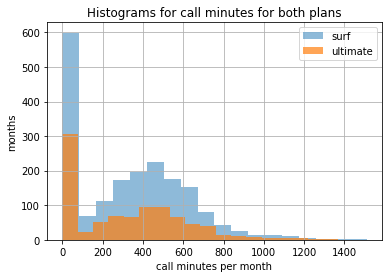

In [67]:
#### Before removing months with 0 minutes

print("#### Before removing months with 0 minutes")
print()

# Histograms for both plans
df[df['plan'] == 'surf']['call_duration'].hist(bins = 18, alpha = 0.5, label='surf')
df[df['plan'] == 'ultimate']['call_duration'].hist(bins = 18, alpha = 0.7, label='ultimate')
plt.title('Histograms for call minutes for both plans')
plt.xlabel('call minutes per month')
plt.ylabel('months')
plt.legend(loc='best')
plt.show()

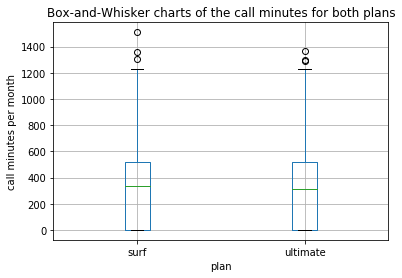

In [68]:
# create columns 'surf' and 'ultimate' for creating Box-and_whisker charts for both plans
for plan in plans:
    for i in range(len(df)):
        if df.loc[i, 'plan'] == plan:
            df.loc[i, plan] = df.loc[i, 'call_duration']

# Boxplots for both plans
df.boxplot(column=['surf', 'ultimate'])
plt.title('Box-and-Whisker charts of the call minutes for both plans')
plt.xlabel('plan')
plt.ylabel('call minutes per month')
plt.show()

In [69]:
# Calculate the upper limits for outliers regarding the boxplots
Q1_surf = df['surf'].quantile(0.25)
Q3_surf = df['surf'].quantile(0.75)
Q1_ult = df['ultimate'].quantile(0.25)
Q3_ult = df['ultimate'].quantile(0.75)
print("The upper limit for outliers regarding the boxplots is {:.0f} for the surf plan".format(Q3_surf+1.5*(Q3_surf-Q1_surf)))
print("and {:.0f} for ultimate plan.".format(Q3_ult+1.5*(Q3_ult-Q1_ult)))

The upper limit for outliers regarding the boxplots is 1302 for the surf plan
and 1288 for ultimate plan.


In [70]:
# Imortant values for both plans
print("Description for the plan 'surf':")
print()
print(df['surf'].describe().apply("{:.0f}".format))
print()
print("Description for the plan 'ultimate':")
print()
print(df['ultimate'].describe().apply("{:.0f}".format))

Description for the plan 'surf':

count    1896
mean      325
std       281
min         0
25%         0
50%       332
75%       521
max      1510
Name: surf, dtype: object

Description for the plan 'ultimate':

count     909
mean      317
std       287
min         0
25%         0
50%       311
75%       515
max      1369
Name: ultimate, dtype: object


In [71]:
print("One can see in the Boxplots and Descriptions the lower quartile and the minimum for both plans is 0 minutes per month.")
print("{:.1%} of all months with surf plan and {:.1%} of all months with ultimate plan have 0 call minutes.". \
      format(surf_0min, ult_0min))

One can see in the Boxplots and Descriptions the lower quartile and the minimum for both plans is 0 minutes per month.
29.4% of all months with surf plan and 30.8% of all months with ultimate plan have 0 call minutes.


This means that there are some customers that don't use the call service for both plans.

In [72]:
# Since these percentages are very high and since I want to see the customer's behaviour for those using the service,
# I filter the months with a call duration of 0 minutes.

df_minutes_filtered = df[df['call_duration'] > 0]

Let's plot the histograms again:

#### After removing months with 0 minutes



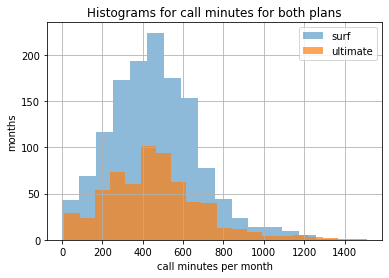

In [73]:
#### After removing months with 0 minutes


print("#### After removing months with 0 minutes")
print()

# Histograms for both plans
df_minutes_filtered[df_minutes_filtered['plan'] == 'surf']['call_duration'].hist(bins = 18, alpha = 0.5, label='surf')
df_minutes_filtered[df_minutes_filtered['plan'] == 'ultimate']['call_duration'].hist(bins = 18, alpha = 0.7, label='ultimate')
plt.title('Histograms for call minutes for both plans')
plt.xlabel('call minutes per month')
plt.ylabel('months')
plt.legend(loc='best')
plt.show()

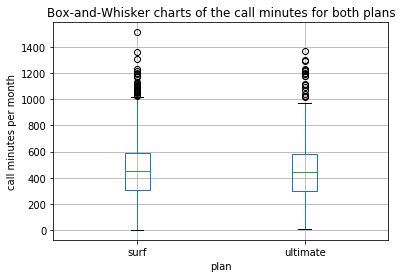

In [74]:
# Boxplots for both plans
df_minutes_filtered.boxplot(column=['surf', 'ultimate'])
plt.title('Box-and-Whisker charts of the call minutes for both plans')
plt.xlabel('plan')
plt.ylabel('call minutes per month')
plt.show()

In [75]:
# Calculate the upper limits for outliers regarding the boxplots
Q1_surf = df_minutes_filtered['surf'].quantile(0.25)
Q3_surf = df_minutes_filtered['surf'].quantile(0.75)
Q1_ult = df_minutes_filtered['ultimate'].quantile(0.25)
Q3_ult = df_minutes_filtered['ultimate'].quantile(0.75)
print("The upper limit for outliers regarding the boxplots is {:.0f} for the surf plan".format(Q3_surf+1.5*(Q3_surf-Q1_surf)))
print("and {:.0f} for ultimate plan.".format(Q3_ult+1.5*(Q3_ult-Q1_ult)))

The upper limit for outliers regarding the boxplots is 1020 for the surf plan
and 1008 for ultimate plan.


In [76]:
# Imortant values for both plans
print("Description for the plan 'surf':")
print()
print(df_minutes_filtered['surf'].describe().apply("{:.0f}".format))
print()
print("Description for the plan 'ultimate':")
print()
print(df_minutes_filtered['ultimate'].describe().apply("{:.0f}".format))

Description for the plan 'surf':

count    1339
mean      460
std       222
min         2
25%       308
50%       449
75%       592
max      1510
Name: surf, dtype: object

Description for the plan 'ultimate':

count     629
mean      458
std       233
min        12
25%       298
50%       444
75%       582
max      1369
Name: ultimate, dtype: object


In [77]:
# The minimums and the lower quartiles are different. I will remove the upper outliers regarding the limit given
# by the boxplot.

df_minutes_surf = df_minutes_filtered[df_minutes_filtered['call_duration'] <= Q3_surf+1.5*(Q3_surf-Q1_surf)]
df_minutes_ult = df_minutes_filtered[df_minutes_filtered['call_duration'] <= Q3_ult+1.5*(Q3_ult-Q1_ult)]

<a id="3.1.2"></a>

#### 3.1.2) Text messages per month

In [78]:
######## Text messages per month (column: message_count)

# quote of months wit 0 messages for both plans
surf_0mess = len(df[(df['message_count'] == 0)&(df['plan'] == 'surf')]) / len(df[df['plan'] == 'surf'])
ult_0mess =  len(df[(df['message_count'] == 0)&(df['plan'] == 'ultimate')]) / len(df[df['plan'] == 'ultimate'])

# drop columns 'surf' and 'ultimate' from analysis before
df = df.drop(columns=['surf', 'ultimate'])

#### Before removing months with 0 messages



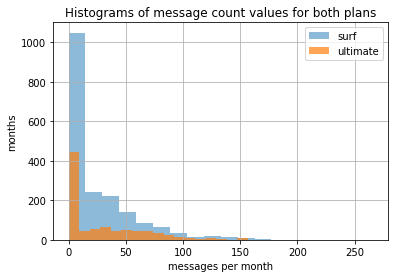

In [79]:
#### Before removing months with 0 messages

print("#### Before removing months with 0 messages")
print()

# Histograms for both plans
df[df['plan'] == 'surf']['message_count'].hist(bins = 18, alpha = 0.5, label='surf')
df[df['plan'] == 'ultimate']['message_count'].hist(bins = 18, alpha = 0.7, label='ultimate')
plt.title('Histograms of message count values for both plans')
plt.xlabel('messages per month')
plt.ylabel('months')
plt.legend(loc='best')
plt.show()

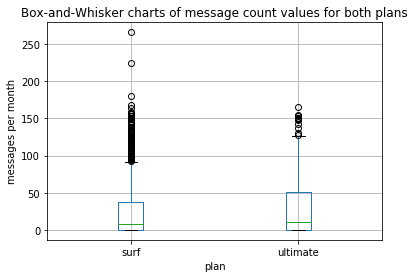

In [80]:
# create columns 'surf' and 'ultimate' for creating Box-and_whisker charts for both plans
for plan in plans:
    for i in range(len(df)):
        if df.loc[i, 'plan'] == plan:
            df.loc[i, plan] = df.loc[i, 'message_count']

# Boxplots for both plans
df.boxplot(column=['surf', 'ultimate'])
plt.title('Box-and-Whisker charts of message count values for both plans')
plt.xlabel('plan')
plt.ylabel('messages per month')
plt.show()

In [81]:
# Calculate the upper limits for outliers regarding the boxplots
Q1_surf = df['surf'].quantile(0.25)
Q3_surf = df['surf'].quantile(0.75)
Q1_ult = df['ultimate'].quantile(0.25)
Q3_ult = df['ultimate'].quantile(0.75)
print("The upper limit for outliers regarding the boxplots is {:.0f} for the surf plan".format(Q3_surf+1.5*(Q3_surf-Q1_surf)))
print("and {:.0f} for ultimate plan.".format(Q3_ult+1.5*(Q3_ult-Q1_ult)))

The upper limit for outliers regarding the boxplots is 92 for the surf plan
and 128 for ultimate plan.


In [82]:
# Imortant values for both plans
print("Description for the plan 'surf':")
print()
print(df['surf'].describe().apply("{:.0f}".format))
print()
print("Description for the plan 'ultimate':")
print()
print(df['ultimate'].describe().apply("{:.0f}".format))

Description for the plan 'surf':

count    1896
mean       23
std        33
min         0
25%         0
50%         8
75%        37
max       266
Name: surf, dtype: object

Description for the plan 'ultimate':

count    909
mean      28
std       35
min        0
25%        0
50%       11
75%       51
max      166
Name: ultimate, dtype: object


In [83]:
print("One can see in the Boxplots and Descriptions the lower quartile and the minimum for both plans is 0 messages per month.")
print("{:.1%} of all months with surf plan and {:.1%} of all months with ultimate plan have 0 messages.". \
      format(surf_0mess, ult_0mess))
print("This means that there are some customers that don't use the message service for both plans.")

One can see in the Boxplots and Descriptions the lower quartile and the minimum for both plans is 0 messages per month.
44.2% of all months with surf plan and 43.5% of all months with ultimate plan have 0 messages.
This means that there are some customers that don't use the message service for both plans.


In [84]:
# Since these percentages are very high and since I want to see the customer's behaviour for those using the service,
# I filter the months with a 0 messages.

df_messages_filtered = df[df['message_count'] > 0]

Let's plot again the Histograms:

#### After removing months with 0 messages



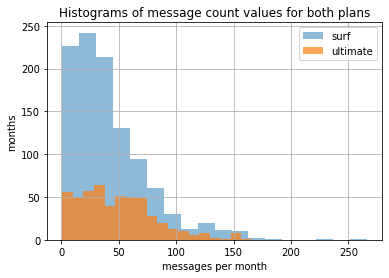

In [85]:
#### After removing months with 0 messages

print("#### After removing months with 0 messages")
print()

# Histograms for both plans
df_messages_filtered[df_messages_filtered['plan'] == 'surf']['message_count'].hist(bins = 18, alpha = 0.5, label='surf')
df_messages_filtered[df_messages_filtered['plan'] == 'ultimate']['message_count'].hist(bins = 18, alpha = 0.7, label='ultimate')
plt.title('Histograms of message count values for both plans')
plt.xlabel('messages per month')
plt.ylabel('months')
plt.legend(loc='best')
plt.show()

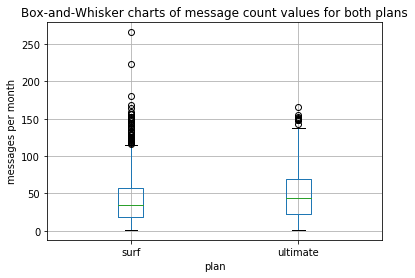

In [86]:
# Boxplots for both plans
df_messages_filtered.boxplot(column=['surf', 'ultimate'])
plt.title('Box-and-Whisker charts of message count values for both plans')
plt.xlabel('plan')
plt.ylabel('messages per month')
plt.show()

In [87]:
# Calculate the upper limits for outliers regarding the boxplots
Q1_surf = df_messages_filtered['surf'].quantile(0.25)
Q3_surf = df_messages_filtered['surf'].quantile(0.75)
Q1_ult = df_messages_filtered['ultimate'].quantile(0.25)
Q3_ult = df_messages_filtered['ultimate'].quantile(0.75)
print("The upper limit for outliers regarding the boxplots is {:.0f} for the surf plan".format(Q3_surf+1.5*(Q3_surf-Q1_surf)))
print("and {:.0f} for ultimate plan.".format(Q3_ult+1.5*(Q3_ult-Q1_ult)))

The upper limit for outliers regarding the boxplots is 116 for the surf plan
and 137 for ultimate plan.


In [88]:
# Imortant values for both plans
print("Description for the plan 'surf':")
print()
print(df_messages_filtered['surf'].describe().apply("{:.0f}".format))
print()
print("Description for the plan 'ultimate':")
print()
print(df_messages_filtered['ultimate'].describe().apply("{:.0f}".format))

Description for the plan 'surf':

count    1058
mean       42
std        34
min         1
25%        18
50%        34
75%        57
max       266
Name: surf, dtype: object

Description for the plan 'ultimate':

count    514
mean      49
std       33
min        1
25%       23
50%       44
75%       69
max      166
Name: ultimate, dtype: object


In [89]:
# Now, the minimums and the lower quartiles are different. I will remove the upper outliers regarding the limit given
# by the boxplot.

df_messages_surf = df_messages_filtered[df_messages_filtered['message_count'] <= Q3_surf+1.5*(Q3_surf-Q1_surf)]
df_messages_ult = df_messages_filtered[df_messages_filtered['message_count'] <= Q3_ult+1.5*(Q3_ult-Q1_ult)]

<a id="3.1.3"></a>

#### 3.1.3) Data volume per month

In [90]:
######## Data volume per month (column: gb_used)

# quote of months with 0 GB used for both plans
surf_0gb = len(df[(df['gb_used'] == 0)&(df['plan'] == 'surf')]) / len(df[df['plan'] == 'surf'])
ult_0gb =  len(df[(df['gb_used'] == 0)&(df['plan'] == 'ultimate')]) / len(df[df['plan'] == 'ultimate'])

# drop columns 'surf' and 'ultimate' from analysis before
df = df.drop(columns=['surf', 'ultimate'])

#### Before removing months with 0 GB used



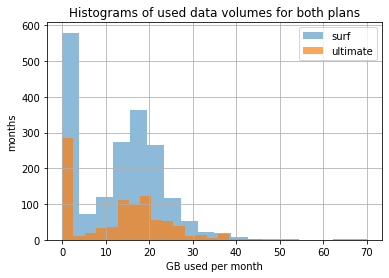

In [91]:
#### Before removing months with 0 GB used

print("#### Before removing months with 0 GB used")
print()

# Histograms for both plans
df[df['plan'] == 'surf']['gb_used'].hist(bins = 18, alpha = 0.5, label='surf')
df[df['plan'] == 'ultimate']['gb_used'].hist(bins = 18, alpha = 0.7, label='ultimate')
plt.title('Histograms of used data volumes for both plans')
plt.xlabel('GB used per month')
plt.ylabel('months')
plt.legend(loc='best')
plt.show()

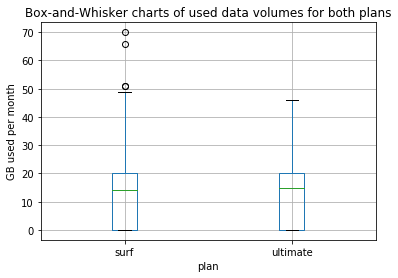

In [92]:
# create columns 'surf' and 'ultimate' for creating Box-and_whisker charts for both plans
for plan in plans:
    for i in range(len(df)):
        if df.loc[i, 'plan'] == plan:
            df.loc[i, plan] = df.loc[i, 'gb_used']

# Boxplots for both plans
df.boxplot(column=['surf', 'ultimate'])
plt.title('Box-and-Whisker charts of used data volumes for both plans')
plt.xlabel('plan')
plt.ylabel('GB used per month')
plt.show()

In [93]:
# Calculate the upper limits for outliers regarding the boxplots
Q1_surf = df['surf'].quantile(0.25)
Q3_surf = df['surf'].quantile(0.75)
Q1_ult = df['ultimate'].quantile(0.25)
Q3_ult = df['ultimate'].quantile(0.75)
print("The upper limit for outliers regarding the boxplots is {:.0f} for the surf plan".format(Q3_surf+1.5*(Q3_surf-Q1_surf)))
print("and {:.0f} for ultimate plan.".format(Q3_ult+1.5*(Q3_ult-Q1_ult)))

The upper limit for outliers regarding the boxplots is 50 for the surf plan
and 50 for ultimate plan.


In [94]:
# Imortant values for both plans
print("Description for the plan 'surf':")
print()
print(df['surf'].describe().apply("{:.0f}".format))
print()
print("Description for the plan 'ultimate':")
print()
print(df['ultimate'].describe().apply("{:.0f}".format))

Description for the plan 'surf':

count    1896
mean       13
std        10
min         0
25%         0
50%        14
75%        20
max        70
Name: surf, dtype: object

Description for the plan 'ultimate':

count    909
mean      13
std       10
min        0
25%        0
50%       15
75%       20
max       46
Name: ultimate, dtype: object


In [95]:
print("One can see in the Boxplots and Descriptions the lower quartile and the minimum for both plans is 0 GB per month.")
print("{:.1%} of all months with surf plan and {:.1%} of all months with ultimate plan have 0 GB of data volume.". \
      format(surf_0gb, ult_0gb))

One can see in the Boxplots and Descriptions the lower quartile and the minimum for both plans is 0 GB per month.
28.5% of all months with surf plan and 30.6% of all months with ultimate plan have 0 GB of data volume.


This means that there are some customers that don't use the Internet service for both plans. Since these percentages are very high and since I want to see the customer's behaviour for those using the service, I filter the months with 0 GB used.

In [96]:
# filter the months with 0 GB used

df_internet_filtered = df[df['gb_used'] > 0]

Let's plot again the Histograms:

#### After removing months with 0 GB used



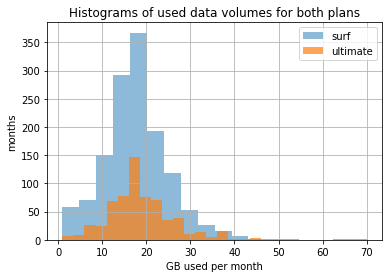

In [97]:
#### After removing months with 0 GB used

print("#### After removing months with 0 GB used")
print()

# Histograms for both plans
df_internet_filtered[df_internet_filtered['plan'] == 'surf']['gb_used'].hist(bins = 18, alpha = 0.5, label='surf')
df_internet_filtered[df_internet_filtered['plan'] == 'ultimate']['gb_used'].hist(bins = 18, alpha = 0.7, label='ultimate')
plt.title('Histograms of used data volumes for both plans')
plt.xlabel('GB used per month')
plt.ylabel('months')
plt.legend(loc='best')
plt.show()

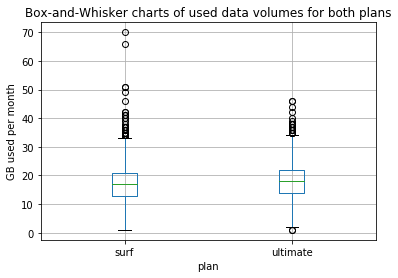

In [98]:
# Boxplots for both plans
df_internet_filtered.boxplot(column=['surf', 'ultimate'])
plt.title('Box-and-Whisker charts of used data volumes for both plans')
plt.xlabel('plan')
plt.ylabel('GB used per month')
plt.show()

In [99]:
# Calculate the upper limits for outliers regarding the boxplots
Q1_surf = df_internet_filtered['surf'].quantile(0.25)
Q3_surf = df_internet_filtered['surf'].quantile(0.75)
Q1_ult = df_internet_filtered['ultimate'].quantile(0.25)
Q3_ult = df_internet_filtered['ultimate'].quantile(0.75)
print("The upper limit for outliers regarding the boxplots is {:.0f} for the surf plan".format(Q3_surf+1.5*(Q3_surf-Q1_surf)))
print("and {:.0f} for ultimate plan.".format(Q3_ult+1.5*(Q3_ult-Q1_ult)))

The upper limit for outliers regarding the boxplots is 33 for the surf plan
and 34 for ultimate plan.


In [100]:
# Imortant values for both plans
print("Description for the plan 'surf':")
print()
print(df_internet_filtered['surf'].describe().apply("{:.0f}".format))
print()
print("Description for the plan 'ultimate':")
print()
print(df_internet_filtered['ultimate'].describe().apply("{:.0f}".format))

Description for the plan 'surf':

count    1355
mean       18
std         7
min         1
25%        13
50%        17
75%        21
max        70
Name: surf, dtype: object

Description for the plan 'ultimate':

count    631
mean      18
std        7
min        1
25%       14
50%       18
75%       22
max       46
Name: ultimate, dtype: object


In [101]:
print("Now, the minimums and the lower quartiles are different. I will remove the upper outliers regarding the limit given")
print("by the boxplot.")

df_internet_surf = df_internet_filtered[df_internet_filtered['gb_used'] <= Q3_surf+1.5*(Q3_surf-Q1_surf)]
df_internet_ult = df_internet_filtered[df_internet_filtered['gb_used'] <= Q3_ult+1.5*(Q3_ult-Q1_ult)]

Now, the minimums and the lower quartiles are different. I will remove the upper outliers regarding the limit given
by the boxplot.


#### Conclusion

Since the used GBs and the call minutes and the message counts are all integers, I use common histograms for showing the distributions and use describe(), mean() or std() method for calculating the needed values. <br>

For every parameter (call minutes, message counts and GB used) I found extraordinary high quotes of months where the customers didn't use the services:
- Call minutes: 29.4% (surf) and 30.8% (ultimate)
- Messages: 44.2% (surf) and 43.5% (ultimate)
- Data volume: 28.5% (surf) and 30.6% (ultimate)

The call and internet services have around 30% unused months and the message service even around 44%; there's not a significant difference between surf and ultimate prepaid plan. <br>
Due to these high percentages of unused services I decided to filter them, so I get more readable histograms and can see better the distribution of those months where the services have been used. These histograms have been filtered ordinarily with the method of interquartile distances.

<a id="3.2"></a>

### 3.2) After removing outliers

<a id="3.2.1"></a>

#### 3.2.1) Call minutes per month

In [102]:
######## call minutes per month after removing outliers

# important values
surf_mean = df_minutes_surf['surf'].mean()
ult_mean = df_minutes_ult['ultimate'].mean()
surf_std = df_minutes_surf['surf'].std()
ult_std = df_minutes_ult['ultimate'].std()

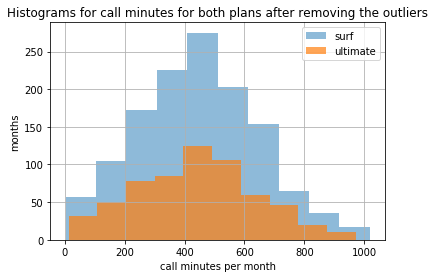

In [103]:
# Histograms for both plans
df_minutes_surf['surf'].hist(bins = 10, alpha = 0.5, label='surf')
df_minutes_ult['ultimate'].hist(bins = 10, alpha = 0.7, label='ultimate')
plt.title('Histograms for call minutes for both plans after removing the outliers')
plt.xlabel('call minutes per month')
plt.ylabel('months')
plt.legend(loc='best')
plt.show()

In [104]:
# Calculate important values
print("Surf mean: {:.1f} minutes".format(surf_mean))
print("Ultimate mean: {:.1f} minutes".format(ult_mean))
print()
print("Surf standard deviation: {:.1f} minutes".format(surf_std))
print("Ultimate standard deviation: {:.1f} minutes".format(ult_std))
print()
print("Surf dispersion: {:.1f} minutes".format((df_minutes_surf['surf'] - surf_mean).abs().mean()))
print("Ultimate dispersion: {:.1f} minutes".format((df_minutes_ult['ultimate'] - ult_mean).abs().mean()))

Surf mean: 445.3 minutes
Ultimate mean: 437.2 minutes

Surf standard deviation: 200.2 minutes
Ultimate standard deviation: 202.3 minutes

Surf dispersion: 160.6 minutes
Ultimate dispersion: 161.7 minutes


##### Conclusion

Even though the number of users for the ultimate plan is smaller than the number of users for the other plan, the distributions of call minutes for both plans have means, standard deviations and dispersions that are very similar. <br>
The distributions for both plans look normal distributed with their peaks located at approx. 400-500 minutes. <br>
This range covers the limit for call minutes without to pay extra in surf plan: 500 minutes. <br>
This estimated location for the peak is mirrored in the both calculated means for the plans. <br>
On the left side where the call minutes tend to zero, the bars for both plans are higher than on the right side where the months with the most call minutes have around 1000 minutes. One can't observe a skewness in the distribution. The decreasing trend from the maximum is faster to the right side compared to the left side; this can be seen better for the ultimate histogram.

<a id="3.2.2"></a>

#### 3.2.2) Text messages per month

In [105]:
######## Text messages per month after removing outliers

# important values
surf_mean = df_messages_surf['surf'].mean()
ult_mean = df_messages_ult['ultimate'].mean()
surf_std = df_messages_surf['surf'].std()
ult_std = df_messages_ult['ultimate'].std()

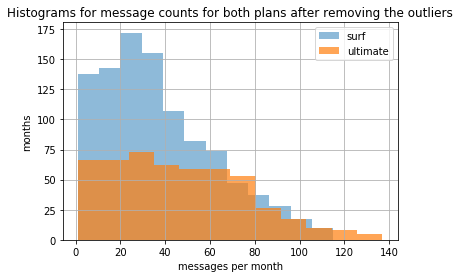

In [106]:
# Histograms for both plans
df_messages_surf['surf'].hist(bins = 12, alpha = 0.5, label='surf')
df_messages_ult['ultimate'].hist(bins = 12, alpha = 0.7, label='ultimate')
plt.title('Histograms for message counts for both plans after removing the outliers')
plt.xlabel('messages per month')
plt.ylabel('months')
plt.legend(loc='best')
plt.show()

In [107]:
# Calculate important values
print("Surf mean: {:.1f} messages".format(surf_mean))
print("Ultimate mean: {:.1f} messages".format(ult_mean))
print()
print("Surf standard deviation: {:.1f} messages".format(surf_std))
print("Ultimate standard deviation: {:.1f} messages".format(ult_std))
print()
print("Surf dispersion: {:.1f} messages".format((df_messages_surf['surf'] - surf_mean).abs().mean()))
print("Ultimate dispersion: {:.1f} messages".format((df_messages_ult['ultimate'] - ult_mean).abs().mean()))

Surf mean: 37.2 messages
Ultimate mean: 46.7 messages

Surf standard deviation: 25.3 messages
Ultimate standard deviation: 30.0 messages

Surf dispersion: 20.4 messages
Ultimate dispersion: 24.9 messages


##### Conclusion

The distribution of the surf histogram resembles a log-normal distribution. When considering the fact that the ultimate plan is covered by less customers, that both histograms show the same circumstance and that there's a litte peak at ca. 30 messages per month for the ultimate plan then one can reason that the ultimate histogram also tends to a log-normal distribution. Both highest bars are located between 20 and 35 messages per month. <br>

Regarding both standard deviations the means for both plans are not in the vicinity of the limits given by the 1-sigma-interval, so it's questionable whether both means differ significantly. One can observe that the decreasing trend to the right begins at ca. 30 messages for the surf histogram, but at 70 messages for the ultimate histogram. <br> 

Regarding the fact that surf user have 50 free messages, this decreasing trend shows on the one hand, that customers of surf plan don't need many messages and on the other hand, that the quote of customers sending a moderate amount of messages is higher for the ultimate users than for the surf users.

<a id="3.2.3"></a>

#### 3.2.3) Data volume per month

In [108]:
######## Data volumes per month after removing outliers

# important values
surf_mean = df_internet_surf['surf'].mean()
ult_mean = df_internet_ult['ultimate'].mean()
surf_std = df_internet_surf['surf'].std()
ult_std = df_internet_ult['ultimate'].std()

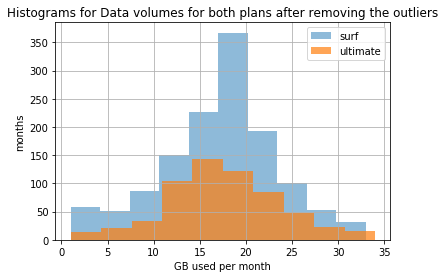

In [109]:
# Histograms for both plans
df_internet_surf['surf'].hist(bins = 10, alpha = 0.5, label='surf')
df_internet_ult['ultimate'].hist(bins = 10, alpha = 0.7, label='ultimate')
plt.title('Histograms for Data volumes for both plans after removing the outliers')
plt.xlabel('GB used per month')
plt.ylabel('months')
plt.legend(loc='best')
plt.show()


In [110]:
# Calculate important values
print("Surf mean: {:.1f} GB".format(surf_mean))
print("Ultimate mean: {:.1f} GB".format(ult_mean))
print()
print("Surf standard deviation: {:.1f} GB".format(surf_std))
print("Ultimate standard deviation: {:.1f} GB".format(ult_std))
print()
print("Surf dispersion: {:.1f} GB".format((df_internet_surf['surf'] - surf_mean).abs().mean()))
print("Ultimate dispersion: {:.1f} GB".format((df_internet_ult['ultimate'] - ult_mean).abs().mean()))

Surf mean: 17.0 GB
Ultimate mean: 17.6 GB

Surf standard deviation: 6.3 GB
Ultimate standard deviation: 6.1 GB

Surf dispersion: 4.9 GB
Ultimate dispersion: 4.7 GB


##### Conclusion

Both distributions look approximately normally distributed. <br>
The decreasing trend is higher on the right side for surf and on the left side for ultimate. This shows that ultimate users like to use much internet since they have 30 GB without to pay more. Interestingly, the highest bar for surf users begins at an higher value than 15 GB whereas the limit for extra pay begins at 15 GB for these users; that explains the big decreasing trend on the right side. When looking at 0-5 GB, the quote of surf users is higher than for ultimate users. That shows that there are more ultimate users that use a moderate amount of internet. <br>
Here again, all three values for mean, standard deviation and dispersion are very similar for both plans.

<a id="4"></a>

## 4) Test the hypotheses

- Hypothesis 1: The average revenue from users of Ultimate and Surf calling plans differs.
- Hypothesis 2: The average revenue from users in NY-NJ area is different from that of the users from other regions.

<a id="4.1"></a>

### 4.1) Hypothesis 1: The average revenue from users of Ultimate and Surf calling plans differs.

###### Prepare the data

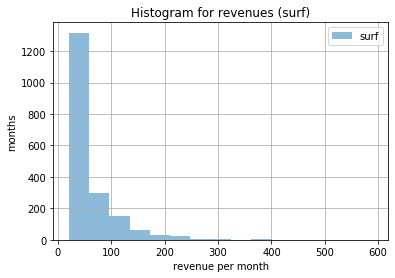

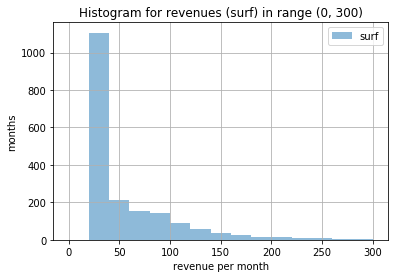

In [111]:
# Histograms for surf plan
df[df['plan'] == 'surf']['revenue'].hist(bins = 15, alpha = 0.5, label='surf')
plt.title('Histogram for revenues (surf)')
plt.xlabel('revenue per month')
plt.ylabel('months')
plt.legend(loc='best')
plt.show()

df[df['plan'] == 'surf']['revenue'].hist(bins = 15, alpha = 0.5, label='surf', range=(0, 300))
plt.title('Histogram for revenues (surf) in range (0, 300)')
plt.xlabel('revenue per month')
plt.ylabel('months')
plt.legend(loc='best')
plt.show()

In [112]:
# delete outliers

print(df[df['plan'] == 'surf']['revenue'].describe().apply("{:.0f}".format))
print()
print("Regarding the decreasing trend in the histogram showing the range (0, 300) I delete values bigger than")
print("200 Dollars.")

df_revenue_surf = df[(df['plan'] == 'surf') & (df['revenue'] <= 200)]

count    1896
mean       52
std        52
min        20
25%        20
50%        23
75%        70
max       590
Name: revenue, dtype: object

Regarding the decreasing trend in the histogram showing the range (0, 300) I delete values bigger than
200 Dollars.


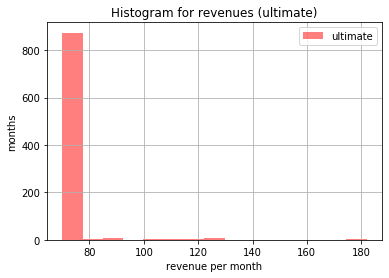

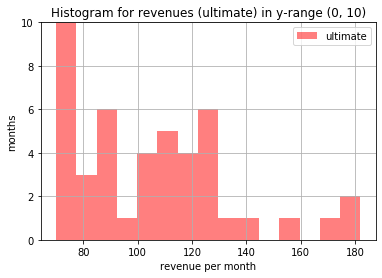

In [113]:
# Histograms for ultimate plan
df[df['plan'] == 'ultimate']['revenue'].hist(bins = 15, alpha = 0.5, color='red', label='ultimate')
plt.title('Histogram for revenues (ultimate)')
plt.xlabel('revenue per month')
plt.ylabel('months')
plt.legend(loc='best')
plt.show()

df[df['plan'] == 'ultimate']['revenue'].hist(bins = 15, alpha = 0.5, color='red', label='ultimate')
plt.ylim(0, 10)
plt.title('Histogram for revenues (ultimate) in y-range (0, 10)')
plt.xlabel('revenue per month')
plt.ylabel('months')
plt.legend(loc='best')
plt.show()

This histogram shows that the ultimate sample is not normal distributed and we have a two-sided test with two independent samples. The hypothesis is that the average revenues from the two samples differ significantly. That's why I do the Mann-Whitney U Test.

In [114]:
# delete outliers

print(df[df['plan'] == 'ultimate']['revenue'].describe().apply("{:.0f}".format))
print()
print("Since there's no mathematical distribution where this distribution can be refered and since there are over 800 months")
print("for 70 Dollars and less than 10 months for each bigger revenue, there's no need to treat them as outliers.")

count    909
mean      72
std       10
min       70
25%       70
50%       70
75%       70
max      182
Name: revenue, dtype: object

Since there's no mathematical distribution where this distribution can be refered and since there are over 800 months
for 70 Dollars and less than 10 months for each bigger revenue, there's no need to treat them as outliers.


In [115]:
df_revenue_ult = df[df['plan'] == 'ultimate']

###### Test of Hypothesis 1

The average revenue from users of Ultimate and Surf calling plans differs.

In [116]:
### Check and adapt size of samples

print("Size of surf sample:", len(df_revenue_surf))
print("Size of ultimate sample:", len(df_revenue_ult))
print()
print("Revenue mean value for surf sample: {:.1f}".format(df_revenue_surf['revenue'].mean()))
print("Revenue mean value for ultimate sample: {:.1f}".format(df_revenue_ult['revenue'].mean()))
print()

df_revenue_surf_sample = df_revenue_surf.sample(n = len(df_revenue_ult))

print("Null hypothesis: The average revenue from users of Ultimate and Surf calling plans doesn't differs significantly.")
print()
print("Alternative hypothesis: The average revenue from users of Ultimate and Surf calling plans does differ significantly.")
print()

alpha = 0.05 # critical statistical significance level
             # if the p-value is less than alpha, we reject the hypothesis

u_statistic, p_value = st.mannwhitneyu(df_revenue_surf_sample['revenue'], df_revenue_ult['revenue'])

print('p-value: ', p_value)
print()

if (p_value < alpha):
        print("We reject the null hypothesis.")
else:
        print("We can't reject the null hypothesis.") 

Size of surf sample: 1849
Size of ultimate sample: 909

Revenue mean value for surf sample: 46.7
Revenue mean value for ultimate sample: 71.8

Null hypothesis: The average revenue from users of Ultimate and Surf calling plans doesn't differs significantly.

Alternative hypothesis: The average revenue from users of Ultimate and Surf calling plans does differ significantly.

p-value:  2.1207840433486805e-84

We reject the null hypothesis.


<a id="4.2"></a>

### 4.2) Hypothesis 2: The average revenue from users in NY-NJ area is different from that of the users from other regions.

###### Prepare data

In [117]:
###### create DataFrame with rows in area NJ-NY
df_revenue_NY = df

In [118]:
# I split the string in city with ' ' into words and take every word of the splitted string in an if-case:
# if one possible string of NJ or NY is equal with the word, then this is the NY-NJ area we looked for an the for-loop
# for the current string breaks. If the word is unequal, then the row will only be deleted, when every word in the
# current string already has been checked; that's the case when the variable x has reached the length of the splitted string

for i in range(len(df_revenue_NY)):
    x = 0
    for word in df_revenue_NY.loc[i, 'city'].split(' '):
        if word == 'NY' or word == 'NJ' or word == 'NY-NJ' or word == 'NJ-NY' or word == 'New-York' or word == 'New-York,' \
          or word == 'New-Jearsy' or word == 'New-Jearsy,':
            break
        else:
            x += 1
            if x == len(df_revenue_NY.loc[i, 'city'].split(' ')):
                df_revenue_NY = df_revenue_NY.drop([i])
            else:
                pass

In [119]:
# Here is the table's head for months with users from NY-NJ
df_revenue_NY.head()

,user_id,month,city,plan,call_duration,call_count,message_count,mb_used,gb_used,revenue,surf,ultimate
409,1076,8,"Buffalo-Cheektowaga, NY MSA",surf,395,44,156,25517.58,25,123.18,25.0,NaN
410,1076,9,"Buffalo-Cheektowaga, NY MSA",surf,364,44,145,23134.42,23,102.85,23.0,NaN
411,1076,10,"Buffalo-Cheektowaga, NY MSA",surf,315,39,159,21310.96,21,83.27,21.0,NaN
412,1076,11,"Buffalo-Cheektowaga, NY MSA",surf,383,50,139,21318.64,21,82.67,21.0,NaN
413,1076,12,"Buffalo-Cheektowaga, NY MSA",surf,395,46,132,15440.81,16,32.46,16.0,NaN


In [120]:
####### create DataFrame with rows that are not in area NJ-NY
df_revenue_not_NY = df

In [121]:
# similar with the for-loop above, but negated
for i in range(len(df_revenue_not_NY)):
    for word in df_revenue_not_NY.loc[i, 'city'].split(' '):
        if word == 'NY' or word == 'NJ' or word == 'NY-NJ' or word == 'NJ-NY' or word == 'New-York' or word == 'New-York,' \
          or word == 'New-Jearsy' or word == 'New-Jearsy,':
            df_revenue_not_NY = df_revenue_not_NY.drop([i])
            break
        else:
            pass

In [122]:
# Here is the table's head for months with users from other areas
df_revenue_not_NY.head()

,user_id,month,city,plan,call_duration,call_count,message_count,mb_used,gb_used,revenue,surf,ultimate
0,1001,9,"Seattle-Tacoma-Bellevue, WA MSA",surf,315,38,44,13314.82,14,20.00,14.0,NaN
1,1001,10,"Seattle-Tacoma-Bellevue, WA MSA",surf,393,47,53,22330.49,22,90.09,22.0,NaN
2,1001,11,"Seattle-Tacoma-Bellevue, WA MSA",surf,426,49,36,18504.30,19,60.00,19.0,NaN
3,1001,12,"Seattle-Tacoma-Bellevue, WA MSA",surf,412,46,44,19369.18,19,60.00,19.0,NaN
4,1002,11,"Las Vegas-Henderson-Paradise, NV MSA",surf,386,48,32,19345.08,19,60.00,19.0,NaN


In [123]:
print("Number of months in NY-NJ area:", len(df_revenue_NY))
print("Number of months in other areas:", len(df_revenue_not_NY))

Number of months in NY-NJ area: 35
Number of months in other areas: 2770


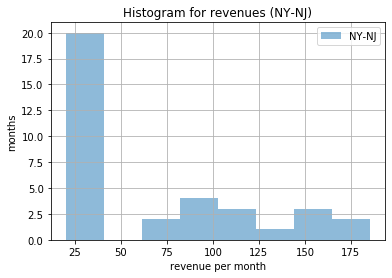

In [124]:
# Histogram for NY area
df_revenue_NY['revenue'].hist(bins = 8, alpha = 0.5, label='NY-NJ')
plt.title('Histogram for revenues (NY-NJ)')
plt.xlabel('revenue per month')
plt.ylabel('months')
plt.legend(loc='best')
plt.show()

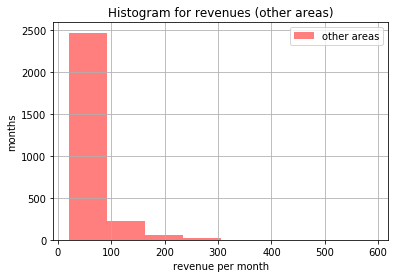

In [125]:
# Histogram for other areas
df_revenue_not_NY['revenue'].hist(bins = 8, alpha = 0.5, label='other areas', color='red')
plt.title('Histogram for revenues (other areas)')
plt.xlabel('revenue per month')
plt.ylabel('months')
plt.legend(loc='best')
plt.show()

This histogram shows that the NY-NJ sample is not normally distributed and we have again a two-sided test with two independent samples. We need again to do the Mann-Whitney U Test for checking if the two mean revenues differ significantly.

###### Test of Hypothesis 2

The average revenue from users in NY-NJ area is different from that of the users from other regions.

In [126]:
### Check and adapt size of samples

print("Size of NY-NJ sample:", len(df_revenue_NY))
print("Size of sample for other areas:", len(df_revenue_not_NY))
print()
print("Revenue mean value for NY-NJ sample: {:.1f}".format(df_revenue_NY['revenue'].mean()))
print("Revenue mean value for the sample in other areas: {:.1f}".format(df_revenue_not_NY['revenue'].mean()))
print()

df_revenue_not_NY_sample = df_revenue_not_NY.sample(n = len(df_revenue_NY))

print("Null hypothesis: The average revenue from users in NY-NJ areas and other areas doesn't differ significantly.")
print()
print("Alternative hypothesis: The average revenue from users in NY-NJ areas and other areas does differ significantly.")
print()

alpha = 0.05 # critical statistical significance level
             # if the p-value is less than alpha, we reject the hypothesis

u_statistic, p_value = st.mannwhitneyu(df_revenue_NY['revenue'], df_revenue_not_NY_sample['revenue'])

print('p-value: ', p_value)
print()

if (p_value < alpha):
        print("We reject the null hypothesis.")
else:
        print("We can't reject the null hypothesis.") 

Size of NY-NJ sample: 35
Size of sample for other areas: 2770

Revenue mean value for NY-NJ sample: 63.6
Revenue mean value for the sample in other areas: 58.4

Null hypothesis: The average revenue from users in NY-NJ areas and other areas doesn't differ significantly.

Alternative hypothesis: The average revenue from users in NY-NJ areas and other areas does differ significantly.

p-value:  0.3408033267984808

We can't reject the null hypothesis.


### Conclusion

For both hypothesis tests I determined samples with revenue distributions that were not clearly referable to a mathematical distribution. For both tests we had independent samples from different sizes and both tests were two-sided tests since the question was essentially if two means were statistical significantly equal. We needed a test for determining whether the two different distributions differ significantly or not. For that kind of question the Mann-Whitney U Test was appropriate. The significance level is set by 5% which is common for such hypothesis tests. <br>

- Hypothesis 1: The average revenue from users of Ultimate and Surf calling plans differs.

Revenue mean value for surf sample: 46.7 Dollars <br>
Revenue mean value for ultimate sample: 71.8 Dollars <br>
Here, the null hypothesis was rejected at a significance level of 5%. That means from a statistical point of view that the difference between the two revenue mean values is significant. My interpretation is that ultimate customers are in average ready to pay more for the service when they know which amount to pay every month since the service gives much data volume, messages and call minutes per month.

- Hypothesis 2: The average revenue from users in NY-NJ area is different from that of the users from other regions.

Revenue mean value for NY-NJ sample: 63.6 Dollars <br>
Revenue mean value for the sample in other areas: 58.4 Dollars <br>
Here, the null hypothesis wasn't rejected at a significance level of 5%. That means from a statistical point of view that the difference between the two revenue mean values is not significant. When looking at the Histograms for revenues in NY-NJ and in other areas in the section 'Prepare Data' then one can see that overall, both distributions look similar: We have many customers that pay substandardly much and some customers that raise the average revenue. That confirms what we found out from our hypothesis test.

<a id="5"></a>

## 5) Overall conclusion

In the analysis I found that many customers don't use all services: <br>
The call and internet services have around 30% unused months and the message service even around 44% and there's not a significant difference between surf and ultimate prepaid plan. <br>
The analysis showed normal distributed histograms for call durations and data volumes whereas the histograms for message counts were not normal distributed; both for surf and ultimate plans. The range with the highest distribution for all three parameters mirrors the limits for these parameters where surf users need to pay extra; so the surf customers pay more attention to not overtax the limits. <br>
When testing the hypotheses at a significance level of 5%, we found out that mean values for revenues don't depend significantly on the location of the customers, but they depend statistical significantly on the prepaid plan. The location statement was only tested for the area 'NY-NJ'; there may be other areas where the significance is bigger. The Mann-Whitney U Test stated out, that the higher mean value of 71.8 Dollars per month for ultimate users is significantly higher than the mean value of 46.7 Dollars per month for surf users. <br> <br>
Overall, this means in average that the probability to take higher revenues is significantly higher when the customer purchases the Ultimate prepaid plan.